In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("CompleteDataSet.csv")

C:\Users\Abhishek Guha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:

print(df.describe)

<bound method NDFrame.describe of        Unnamed: 0               Name  Age  \
0               0  Cristiano Ronaldo   32   
1               1           L. Messi   30   
2               2             Neymar   25   
3               3          L. Suárez   30   
4               4           M. Neuer   31   
5               5     R. Lewandowski   28   
6               6             De Gea   26   
7               7          E. Hazard   26   
8               8           T. Kroos   27   
9               9         G. Higuaín   29   
10             10       Sergio Ramos   31   
11             11       K. De Bruyne   26   
12             12        T. Courtois   25   
13             13         A. Sánchez   28   
14             14          L. Modrić   31   
15             15            G. Bale   27   
16             16          S. Agüero   29   
17             17       G. Chiellini   32   
18             18          G. Buffon   39   
19             19          P. Dybala   23   
20             20    

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
Unnamed: 0             17981 non-null int64
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null int64
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null obj

In [5]:
df.isnull().sum()

Unnamed: 0                0
Name                      0
Age                       0
Photo                     0
Nationality               0
Flag                      0
Overall                   0
Potential                 0
Club                    248
Club Logo                 0
Value                     0
Wage                      0
Special                   0
Acceleration              0
Aggression                0
Agility                   0
Balance                   0
Ball control              0
Composure                 0
Crossing                  0
Curve                     0
Dribbling                 0
Finishing                 0
Free kick accuracy        0
GK diving                 0
GK handling               0
GK kicking                0
GK positioning            0
GK reflexes               0
Heading accuracy          0
                       ... 
Vision                    0
Volleys                   0
CAM                    2029
CB                     2029
CDM                 

In [6]:
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [7]:
df = df[['Name','Age','Nationality','Preferred Positions','Overall','Potential','Club','Value']]
df.head(10)

,Name,Age,Nationality,Preferred Positions,Overall,Potential,Club,Value
0,Cristiano Ronaldo,32,Portugal,ST LW,94,94,Real Madrid CF,€95.5M
1,L. Messi,30,Argentina,RW,93,93,FC Barcelona,€105M
2,Neymar,25,Brazil,LW,92,94,Paris Saint-Germain,€123M
3,L. Suárez,30,Uruguay,ST,92,92,FC Barcelona,€97M
4,M. Neuer,31,Germany,GK,92,92,FC Bayern Munich,€61M
5,R. Lewandowski,28,Poland,ST,91,91,FC Bayern Munich,€92M
6,De Gea,26,Spain,GK,90,92,Manchester United,€64.5M
7,E. Hazard,26,Belgium,LW,90,91,Chelsea,€90.5M
8,T. Kroos,27,Germany,CDM CM,90,90,Real Madrid CF,€79M
9,G. Higuaín,29,Argentina,ST,90,90,Juventus,€77M


In [8]:
df['Remaining Potential'] = df['Potential'] - df['Overall']
# 2.
df['1st Pref Position'] = df['Preferred Positions'].str.split().str[0]
# 3.
df['Unit'] = df['Value'].str[-1]
df['Value (M)'] = np.where(df['Unit'] == '0', 0, df['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
df['Value (M)'] = df['Value (M)'].astype(float)
df['Value (M)'] = np.where(df['Unit'] == 'M', df['Value (M)'], df['Value (M)']/1000)
df = df.drop('Unit', 1)

df.head(20)

,Name,Age,Nationality,Preferred Positions,Overall,Potential,Club,Value,Remaining Potential,1st Pref Position,Value (M)
0,Cristiano Ronaldo,32,Portugal,ST LW,94,94,Real Madrid CF,€95.5M,0,ST,95.5
1,L. Messi,30,Argentina,RW,93,93,FC Barcelona,€105M,0,RW,105.0
2,Neymar,25,Brazil,LW,92,94,Paris Saint-Germain,€123M,2,LW,123.0
3,L. Suárez,30,Uruguay,ST,92,92,FC Barcelona,€97M,0,ST,97.0
4,M. Neuer,31,Germany,GK,92,92,FC Bayern Munich,€61M,0,GK,61.0
5,R. Lewandowski,28,Poland,ST,91,91,FC Bayern Munich,€92M,0,ST,92.0
6,De Gea,26,Spain,GK,90,92,Manchester United,€64.5M,2,GK,64.5
7,E. Hazard,26,Belgium,LW,90,91,Chelsea,€90.5M,1,LW,90.5
8,T. Kroos,27,Germany,CDM CM,90,90,Real Madrid CF,€79M,0,CDM,79.0
9,G. Higuaín,29,Argentina,ST,90,90,Juventus,€77M,0,ST,77.0


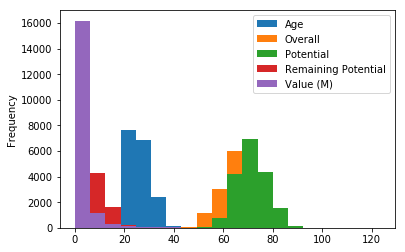

In [9]:
df.plot(kind='hist',bins=20);

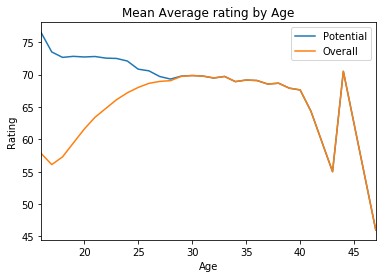

In [10]:
df_potential = df.groupby(['Age'])['Potential'].mean()
df_overall = df.groupby(['Age'])['Overall'].mean()

df_concat = pd.concat([df_potential,df_overall],axis=1)
ax = df_concat.plot();
ax.set_ylabel('Rating');
ax.set_xlabel('Age')
ax.set_title('Mean Average rating by Age');

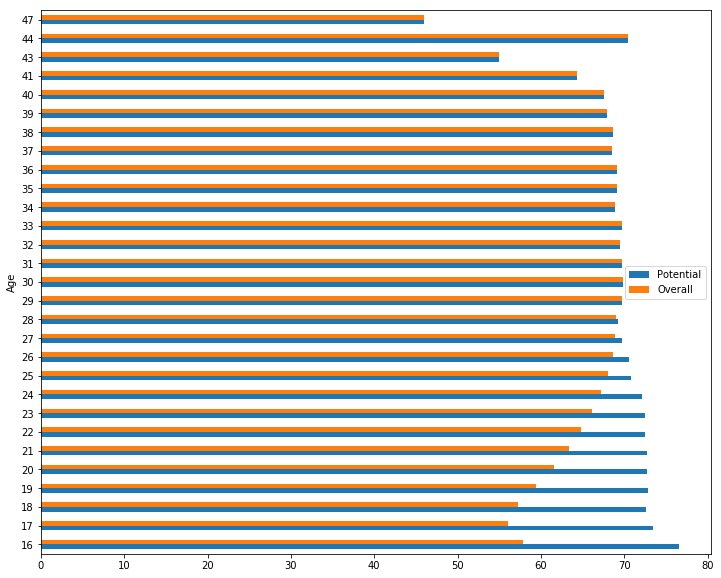

In [11]:
df_concat.plot(kind='barh',figsize=(12,10));

In [12]:
def get_best_eleven(position):
    df_copy = df.copy()
    squad = []
    for i in position:
        squad.append([i,df_copy.loc[[df_copy[df_copy['1st Pref Position'] == i]['Overall'].idxmax()]]
                      ['Name'].to_string(index = False), df_copy[df_copy['1st Pref Position'] == i]['Overall'].max()])
        df_copy.drop(df_copy[df_copy['1st Pref Position'] == i]['Overall'].idxmax(),inplace=True)
    return pd.DataFrame(np.array(squad).reshape(11,3), columns = ['Position', 'Player', 'Overall']).to_string(index = False)
    
positions_4_3_3 = ['GK','LB','CB','CB','RB','LM','CDM','RM','LW','ST','RW']
print('Best "4--3--3" Squad Ever..!!')
print(get_best_eleven(positions_4_3_3))

Best "4--3--3" Squad Ever..!!
Position              Player Overall
      GK            M. Neuer      92
      LB             Marcelo      87
      CB        Sergio Ramos      90
      CB        G. Chiellini      89
      RB            Carvajal      84
      LM          C. Eriksen      87
     CDM            T. Kroos      90
      RM        K. De Bruyne      89
      LW              Neymar      92
      ST   Cristiano Ronaldo      94
      RW            L. Messi      93


In [13]:
position_3_5_2 = ['GK', 'LWB', 'CB', 'RWB', 'LM', 'CDM', 'CAM', 'CM', 'RM', 'LW', 'RW']
print('Best "3--5--2" Squad..!!')
print(get_best_eleven(position_3_5_2))

Best "3--5--2" Squad..!!
Position         Player Overall
      GK       M. Neuer      92
     LWB        D. Rose      82
      CB   Sergio Ramos      90
     RWB      K. Walker      83
      LM     C. Eriksen      87
     CDM       T. Kroos      90
     CAM       Coutinho      86
      CM       N. Kanté      87
      RM   K. De Bruyne      89
      LW         Neymar      92
      RW       L. Messi      93


In [14]:
position_4_2_2_2 = ['GK','LB','CB','CB','RB','CDM','CDM','CAM','CF','ST','ST']
print('Best "4--2--2--2" Squad..!!')
print(get_best_eleven(position_4_2_2_2))

Best "4--2--2--2" Squad..!!
Position              Player Overall
      GK            M. Neuer      92
      LB             Marcelo      87
      CB        Sergio Ramos      90
      CB        G. Chiellini      89
      RB            Carvajal      84
     CDM            T. Kroos      90
     CDM           L. Modrić      89
     CAM            Coutinho      86
      CF           S. Kagawa      83
      ST   Cristiano Ronaldo      94
      ST           L. Suárez      92


In [15]:
squad_352_strict = ['GK', 'LB|LWB', 'CB', 'RB|RWB', 'LM|W$', 'RM|W$', 'CM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'W$|T$', 'W$|T$']
squad_442_strict = ['GK', 'LB|LWB', 'CB', 'CB', 'RB|RWB', 'LM|W$', 'RM|W$', 'CM', 'CM|CAM|CDM', 'W$|T$', 'W$|T$']
squad_433_strict = ['GK', 'LB|LWB', 'CB', 'CB', 'RB|RWB', 'CM|LM|W$', 'CM|RM|W$', 'CM|CAM|CDM', 'W$|T$', 'W$|T$', 'W$|T$']
squad_343_strict = ['GK', 'LB|LWB', 'CB', 'RB|RWB', 'LM|W$', 'RM|W$', 'CM|CAM|CDM', 'CM|CAM|CDM', 'W$|T$', 'W$|T$', 'W$|T$']
squad_532_strict = ['GK', 'LB|LWB', 'CB|LWB|RWB', 'CB|LWB|RWB', 'CB|LWB|RWB', 'RB|RWB', 'M$|W$', 'M$|W$', 'M$|W$', 'W$|T$', 'W$|T$']


squad_list = [squad_352_strict, squad_442_strict, squad_433_strict, squad_343_strict, squad_532_strict]
squad_name = ['3-5-2', '4-4-2', '4-3-3', '3-4-3', '5-3-2']

In [16]:
#Introducing Time Effect for Future Rating..!!
df_concat['Overall age trend factor'] = df_concat['Overall'] / df_concat['Overall'].iloc[0]

# assume players retire at 40
df_summary_trend = df_concat['Overall age trend factor'].loc[16:40]

expand = pd.Series(0, index=range(41,100))

df_summary_trend = df_summary_trend.append(expand)

print(df_summary_trend.head())

16    1.000000
17    0.969626
18    0.990337
19    1.027386
20    1.064199
dtype: float64


In [17]:
def get_best_squad_n_n_yr_later(n, position, nationality):
    df_copy = df.copy()
    df_copy = df_copy[df_copy['Nationality'] == nationality]
    df_copy['Overall_n_yr_later'] = round(df_copy['Age'].apply(lambda x: df_summary_trend.loc[x+n]/df_summary_trend.loc[x])*df_copy['Overall'],1)
    store = []
    for i in position:
        store.append([df_copy.loc[[df_copy[df_copy['1st Pref Position'].str.contains(i)]['Overall_n_yr_later'].idxmax()]]
                      ['1st Pref Position'].to_string(index = False),
                      df_copy.loc[[df_copy[df_copy['1st Pref Position'].str.contains(i)]
                                   ['Overall_n_yr_later'].idxmax()]]['Name'].to_string(index = False), 
                      df_copy[df_copy['1st Pref Position'].str.contains(i)]['Overall_n_yr_later'].max()])
        df_copy.drop(df_copy[df_copy['1st Pref Position'].str.contains(i)]['Overall_n_yr_later'].idxmax(), inplace = True)
    #return store
    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,3), columns = ['Position', 'Player', 'Overall_n_yr_later']).to_string(index = False)

# get next 3 years England's best squad for 3-5-2 based on estimate
for n in range(0,4):
    print('{} years later'.format(n))
    rating_352_EN_Overall_later, best_list_352_EN_Overall_later = get_best_squad_n_n_yr_later(n, squad_352_strict, 'Spain')
    print('Average rating: {:.1f}'.format(rating_352_EN_Overall_later))
    print(best_list_352_EN_Overall_later)
    
#We loop on for some "n" years and find that the players rating do increases as they tend to reach their potential ratings.
#And we see at some point "Azpilicueta" replaces "Jordi Alba" as "LB" due to increase in rating

0 years later
Average rating: 86.4
Position            Player Overall_n_yr_later
      GK            De Gea               90.0
      LB        Jordi Alba               85.0
      CB      Sergio Ramos               90.0
      RB          Carvajal               84.0
      LM       David Silva               87.0
      LW     Marco Asensio               84.0
      CM   Sergio Busquets               86.0
     CDM            Thiago               88.0
     CDM     Javi Martínez               86.0
      ST       Diego Costa               86.0
      ST            Morata               84.0
1 years later
Average rating: 87.0
Position            Player Overall_n_yr_later
      GK            De Gea               90.4
      LB        Jordi Alba               85.8
      CB      Sergio Ramos               89.6
      RB          Carvajal               84.8
      LM              Isco               86.8
      LW     Marco Asensio               85.8
      CM   Sergio Busquets               86.8
     CDM  

In [18]:
for n in range(0,4):
    print('{} years later'.format(n))
    rating_352_SP_Overall_later, best_list_352_SP_Overall_later = get_best_squad_n_n_yr_later(n, squad_352_strict, 'Germany')
    print('Average rating: {:.1f}'.format(rating_352_SP_Overall_later))
    print(best_list_352_SP_Overall_later)
    

0 years later
Average rating: 85.5
Position        Player Overall_n_yr_later
      GK      M. Neuer               92.0
      LB     J. Hector               80.0
      CB    J. Boateng               88.0
      RB    A. Rüdiger               82.0
      RW       M. Özil               88.0
      LW       M. Reus               86.0
      CM     L. Bender               82.0
     CDM      T. Kroos               90.0
     CDM   I. Gündoğan               85.0
      ST     T. Müller               86.0
      ST     T. Werner               82.0
1 years later
Average rating: 86.1
Position        Player Overall_n_yr_later
      GK      M. Neuer               91.6
      LB     J. Hector               80.1
      CB    J. Boateng               88.8
      RB    A. Rüdiger               83.0
      RW       M. Özil               88.8
      LW       M. Reus               86.8
      CM     L. Bender               82.8
     CDM      T. Kroos               90.1
     CDM   I. Gündoğan               85.4
      

In [19]:
for n in range(0,4):
    print('{} years later'.format(n))
    rating_352_SP_Overall_later, best_list_352_SP_Overall_later = get_best_squad_n_n_yr_later(n, squad_532_strict, 'Germany')
    print('Average rating: {:.1f}'.format(rating_352_SP_Overall_later))
    print(best_list_352_SP_Overall_later)

0 years later
Average rating: 86.0
Position       Player Overall_n_yr_later
      GK     M. Neuer               92.0
      LB    J. Hector               80.0
      CB   J. Boateng               88.0
      CB   M. Hummels               88.0
      CB   S. Mustafi               84.0
      RB   A. Rüdiger               82.0
     CDM     T. Kroos               90.0
      RW      M. Özil               88.0
      LW      M. Reus               86.0
      ST    T. Müller               86.0
      ST    T. Werner               82.0
1 years later
Average rating: 86.6
Position       Player Overall_n_yr_later
      GK     M. Neuer               91.6
      LB    J. Hector               80.1
      CB   J. Boateng               88.8
      CB   M. Hummels               88.8
      CB   S. Mustafi               84.8
      RB   A. Rüdiger               83.0
     CDM     T. Kroos               90.1
      RW      M. Özil               88.8
      LW      M. Reus               86.8
      ST    T. Müller       

Text(0, 0.5, 'team rating')

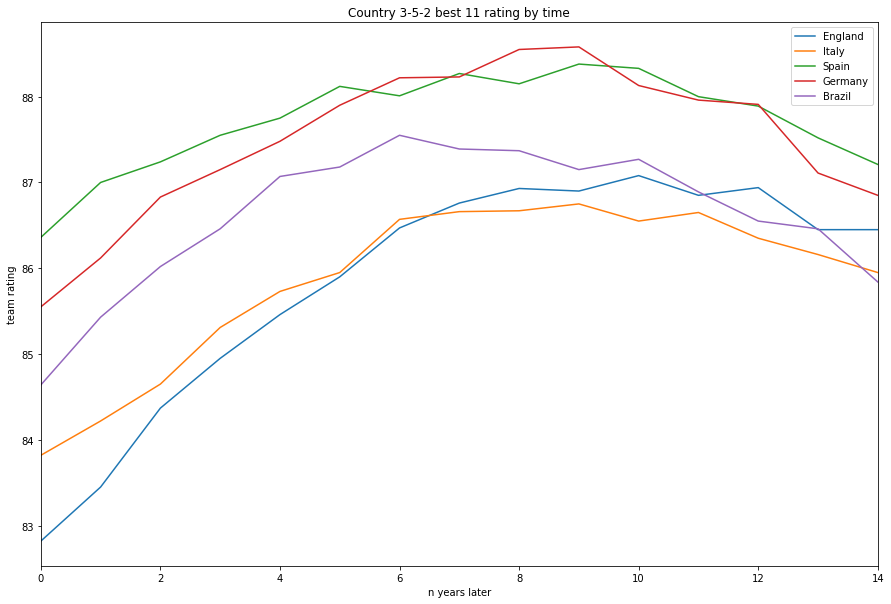

In [21]:
list_of_countries = ['England', 'Italy', 'Spain', 'Germany', 'Brazil']
n_yr = 15

rating_combine = pd.DataFrame(index = range(0, n_yr), columns = list_of_countries)

for c in list_of_countries:
    for n in range(0,n_yr):
        rating_352_Overall_later, _ = get_best_squad_n_n_yr_later(n, squad_352_strict, c)
        rating_combine[c].iloc[n] = rating_352_Overall_later
        
ax = rating_combine.plot(kind = 'line', figsize = (15,10), title = 'Country 3-5-2 best 11 rating by time')
ax.set_xlabel("n years later")
ax.set_ylabel("team rating")

Text(0, 0.5, 'team rating')

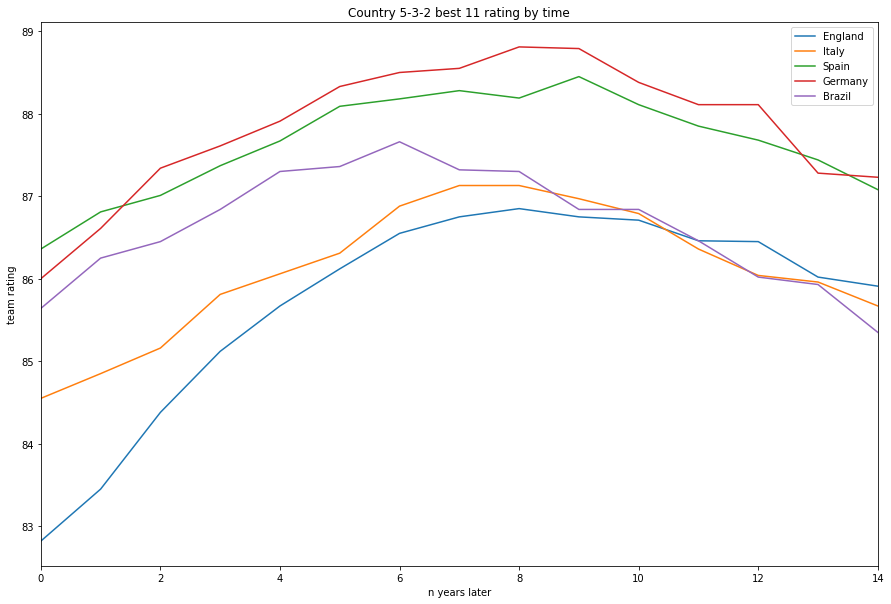

In [22]:
list_of_countries = ['England', 'Italy', 'Spain', 'Germany', 'Brazil']
n_yr = 15

rating_combine = pd.DataFrame(index = range(0, n_yr), columns = list_of_countries)

for c in list_of_countries:
    for n in range(0,n_yr):
        rating_352_Overall_later, _ = get_best_squad_n_n_yr_later(n, squad_532_strict, c)
        rating_combine[c].iloc[n] = rating_352_Overall_later
        
ax = rating_combine.plot(kind = 'line', figsize = (15,10), title = 'Country 5-3-2 best 11 rating by time')
ax.set_xlabel("n years later")
ax.set_ylabel("team rating")

Text(0, 0.5, 'team rating')

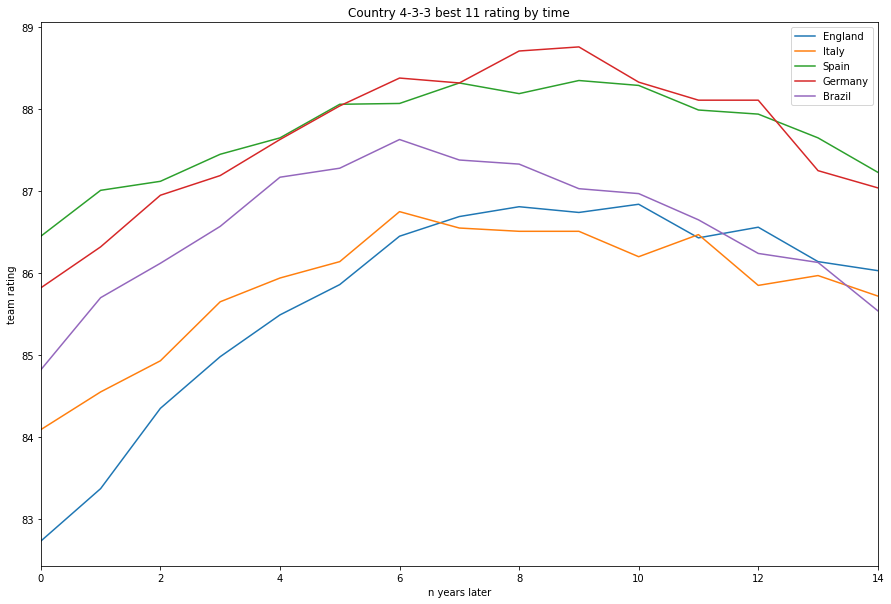

In [23]:
list_of_countries = ['England', 'Italy', 'Spain', 'Germany', 'Brazil']
n_yr = 15

rating_combine = pd.DataFrame(index = range(0, n_yr), columns = list_of_countries)

for c in list_of_countries:
    for n in range(0,n_yr):
        rating_352_Overall_later, _ = get_best_squad_n_n_yr_later(n, squad_433_strict, c)
        rating_combine[c].iloc[n] = rating_352_Overall_later
        
ax = rating_combine.plot(kind = 'line', figsize = (15,10), title = 'Country 4-3-3 best 11 rating by time')
ax.set_xlabel("n years later")
ax.set_ylabel("team rating")

Text(0, 0.5, 'team rating')

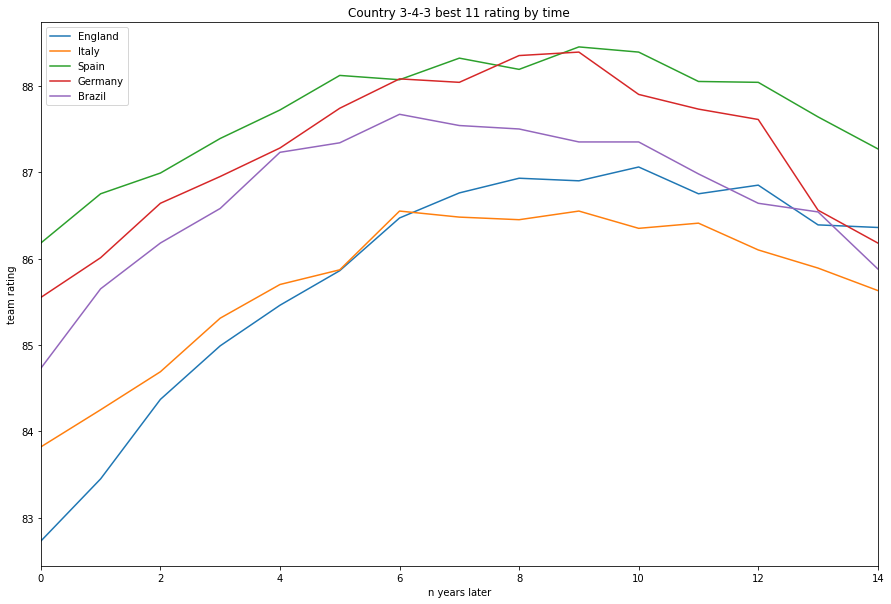

In [24]:
list_of_countries = ['England', 'Italy', 'Spain', 'Germany', 'Brazil']
n_yr = 15

rating_combine = pd.DataFrame(index = range(0, n_yr), columns = list_of_countries)

for c in list_of_countries:
    for n in range(0,n_yr):
        rating_352_Overall_later, _ = get_best_squad_n_n_yr_later(n, squad_343_strict, c)
        rating_combine[c].iloc[n] = rating_352_Overall_later
        
ax = rating_combine.plot(kind = 'line', figsize = (15,10), title = 'Country 3-4-3 best 11 rating by time')
ax.set_xlabel("n years later")
ax.set_ylabel("team rating")

Coefficients:  [[0.47962288]]
Mean squared error: 17.43
Variance score: 0.39


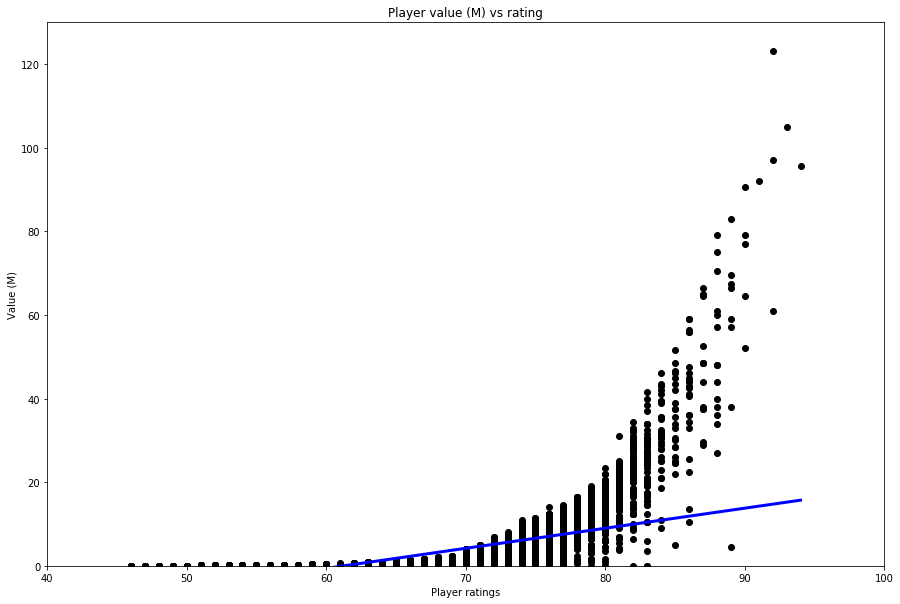

In [25]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
X = df['Overall'].values.reshape(-1,1)
y = df['Value (M)'].values.reshape(-1,1)
regr = linear_model.LinearRegression().fit(X, y)

y_pred = regr.predict(X)
print('Coefficients: ', regr.coef_)
print("Mean squared error: %.2f"% mean_squared_error(y, y_pred))
print('Variance score: %.2f'% r2_score(y, y_pred))

def plot_chart(X, y, y_pred, x_l, x_h, y_l, y_h, c):
    plt.figure(figsize = (15,10))
    plt.scatter(X, y, color=c)
    plt.plot(X, y_pred, color='blue', linewidth=3)

    plt.title('Player value (M) vs rating')
    plt.ylim(y_l,y_h)
    plt.xlim(x_l,x_h)
    plt.ylabel('Value (M)')
    plt.xlabel('Player ratings')
    
plot_chart(X, y, y_pred, 40, 100, 0, 130, 'black')

Coefficients:  [[ 0.         -5.70323363  0.04668862]]
Mean squared error: 7.04
Variance score: 0.76


Text(50, 105, 'Goalkeeper')

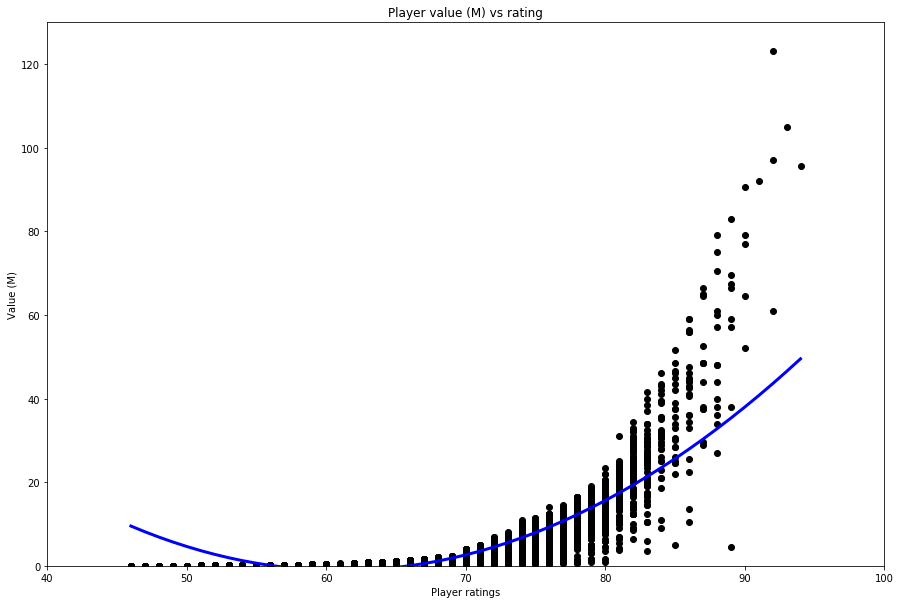

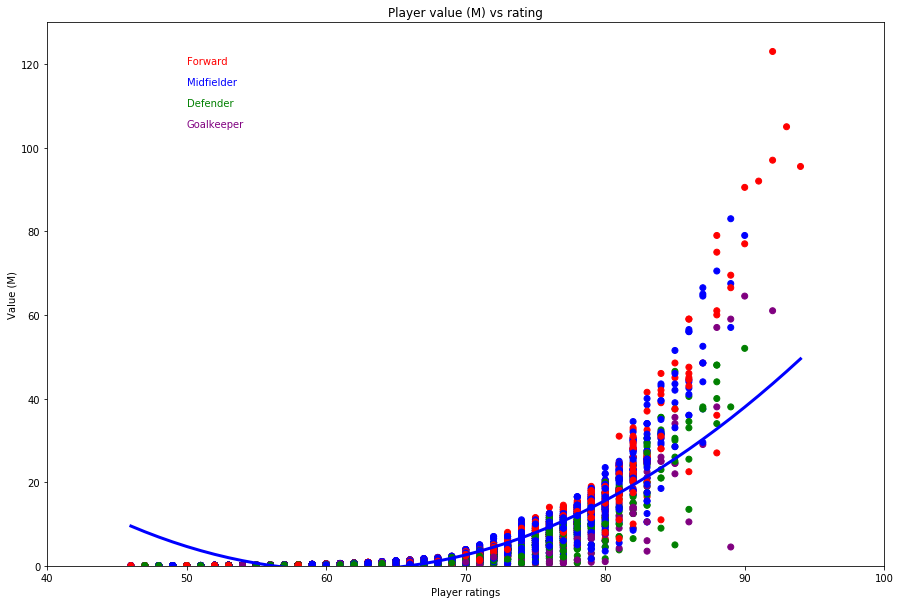

In [26]:
from sklearn.preprocessing import PolynomialFeatures
df_2 = df[df['Value (M)'] != 0]
X_2 = df_2['Overall'].values.reshape(-1,1)
y_2 = df_2['Value (M)'].values.reshape(-1,1)

poly = PolynomialFeatures(degree=2)
X_2_p = poly.fit_transform(X_2)
clf = linear_model.LinearRegression().fit(X_2_p, y_2)
y_2_pred = clf.predict(X_2_p)

print('Coefficients: ', clf.coef_)
print("Mean squared error: %.2f"% mean_squared_error(y_2, y_2_pred))
print('Variance score: %.2f'% r2_score(y_2, y_2_pred))

color_dict = {'ST': 'red', 'CF': 'red', 'LW': 'red', 'RW': 'red',
              'LM': 'blue', 'RM': 'blue', 'CM': 'blue', 'CAM': 'blue', 'CDM': 'blue',
              'LB': 'green', 'RB': 'green', 'CB': 'green', 'LWB': 'green', 'RWB': 'green',
              'GK': 'purple'}

c = df_2['1st Pref Position'].map(color_dict)

plot_chart(X_2, y_2, y_2_pred, 40, 100, 0, 130, 'black')

# by positions
plot_chart(X_2, y_2, y_2_pred, 40, 100, 0, 130, c)
plt.text(50, 120, 'Forward', color = 'red')
plt.text(50, 115, 'Midfielder', color = 'blue')
plt.text(50, 110, 'Defender', color = 'green')
plt.text(50, 105, 'Goalkeeper', color = 'purple')

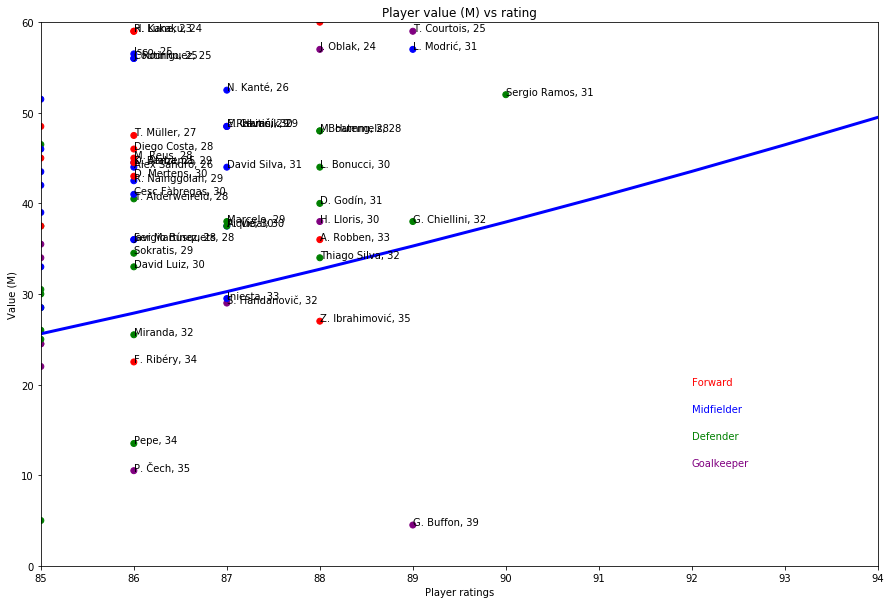

In [27]:
x_low = 85
y_max = 60
plot_chart(X_2, y_2, y_2_pred, x_low, 94, 0, y_max, c)
plt.text(92, 20, 'Forward', color = 'red')
plt.text(92, 17, 'Midfielder', color = 'blue')
plt.text(92, 14, 'Defender', color = 'green')
plt.text(92, 11, 'Goalkeeper', color = 'purple')
ax = plt.gca()
for index, row in df_2.iterrows():
    if row['Overall'] > x_low and row['Value (M)'] < y_max:
        ax.text(row['Overall'], row['Value (M)'], '{}, {}'.format(row['Name'],row['Age']))